# Demonstracja działania przeglądania BFS

- Krzysztof Molenda, 2025-07-04

```{prf:algorithm} BFS -- szkic implementacji
:label: bfs-pseudocode2

1. Utwórz kolejkę `Q` i dodaj do niej wierzchołek startowy `s`.
2. Dopóki kolejka `Q` nie jest pusta, wykonuj poniższe kroki:  
    1. Pobierz wierzchołek `v` z przodu kolejki `Q`.
    2. Oznacz wierzchołek `v` jako odwiedzony. Wykonaj akcję na wierzchołku.
    3. Dla każdego sąsiada `u` wierzchołka `v`:
        1. Jeżeli wierzchołek `u` nie był jeszcze odwiedzony, dodaj go do kolejki `Q`.
```

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
def visualize_bfs_separate_images(graph, start):
    visited = set()
    queue = [start]
    pos = nx.spring_layout(graph)  # stały układ wierzchołków
    step = 0

    while queue:
        print(f"krok: {step}, kolejka przed: {queue}")
        v = queue.pop(0)
        print(f"krok: {step}, kolejka po: {queue}")
        if v not in visited:
            visited.add(v)
            # Kolorowanie wierzchołków
            node_colors = [
                'red' if node == v else
                'green' if node in visited else
                'lightblue'
                for node in graph.nodes()
            ]
            plt.figure(figsize=(8, 6))
            nx.draw(
                graph, pos,
                with_labels=True,
                node_color=node_colors,
                node_size=700,
                font_size=16
            )
            plt.title(f'Bieżący wierzchołek: {v}\nKolejka: {queue}')
            plt.show()

            step += 1

            for u in graph.neighbors(v):
                if u not in visited and u not in queue:
                    queue.append(u)
                    print(f"krok: {step}, dodajemy sąsiadów - kolejka: {queue}")

krok: 0, kolejka przed: [1]
krok: 0, kolejka po: []


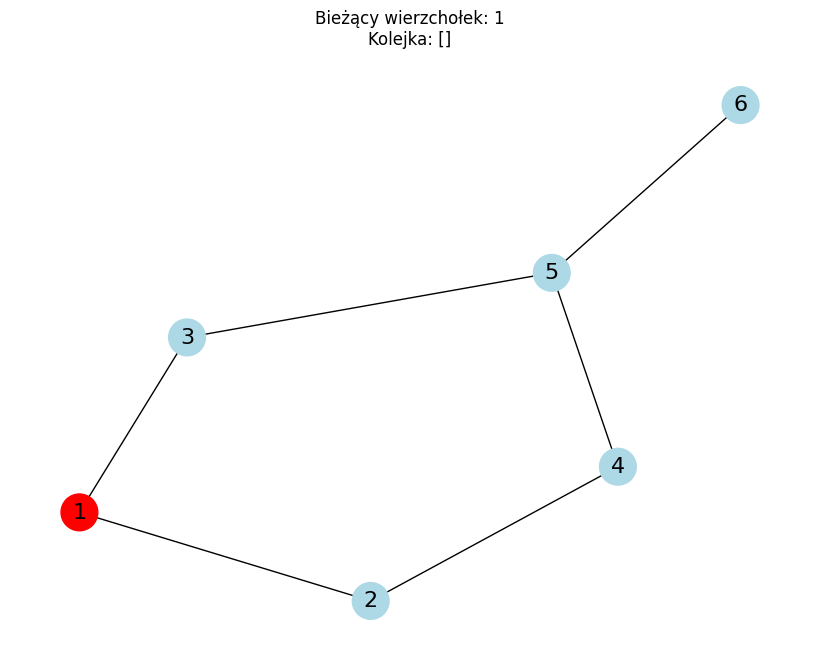

krok: 1, dodajemy sąsiadów - kolejka: [2]
krok: 1, dodajemy sąsiadów - kolejka: [2, 3]
krok: 1, kolejka przed: [2, 3]
krok: 1, kolejka po: [3]


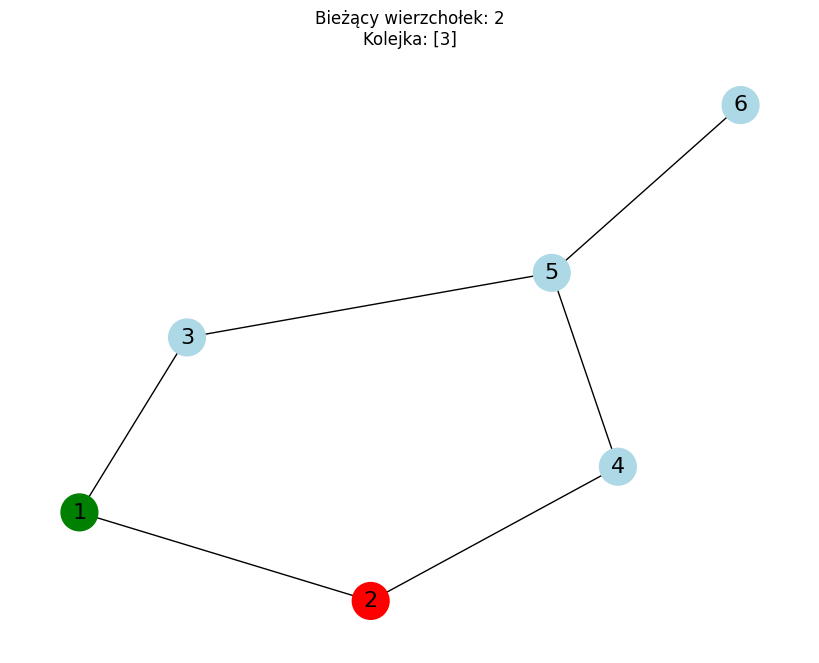

krok: 2, dodajemy sąsiadów - kolejka: [3, 4]
krok: 2, kolejka przed: [3, 4]
krok: 2, kolejka po: [4]


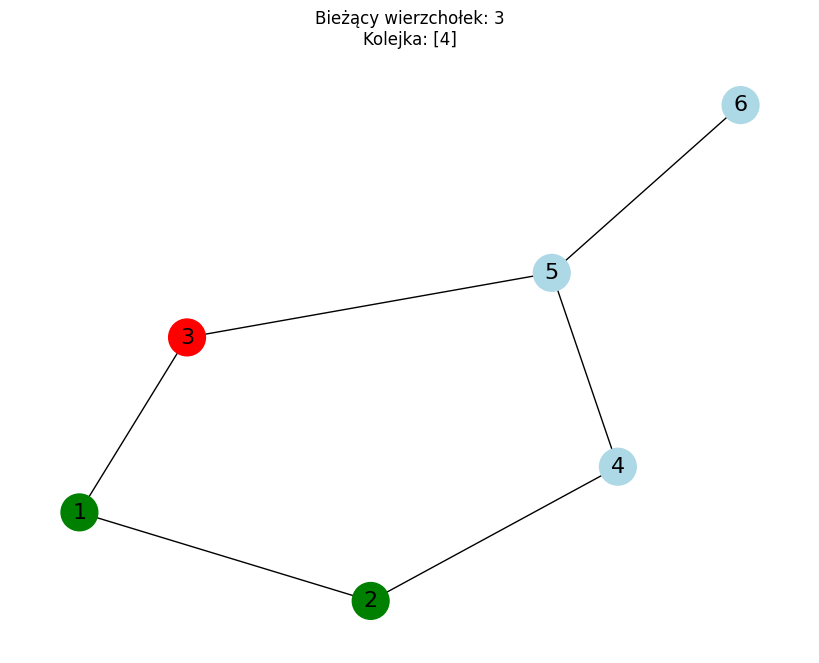

krok: 3, dodajemy sąsiadów - kolejka: [4, 5]
krok: 3, kolejka przed: [4, 5]
krok: 3, kolejka po: [5]


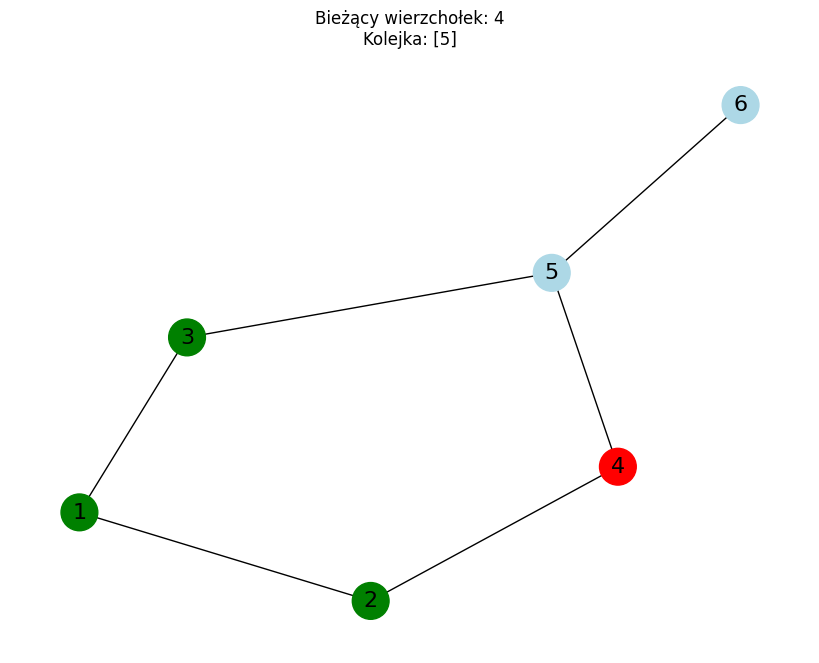

krok: 4, kolejka przed: [5]
krok: 4, kolejka po: []


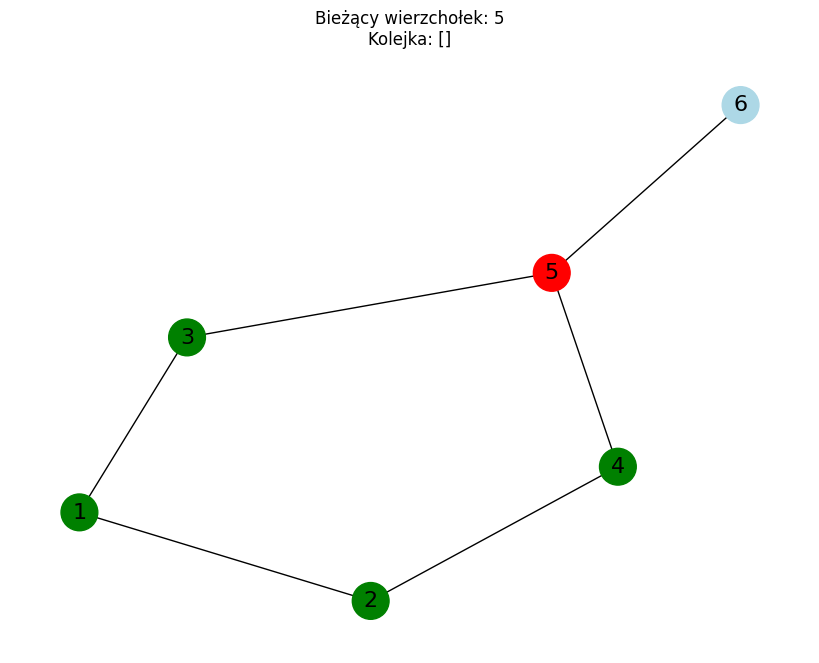

krok: 5, dodajemy sąsiadów - kolejka: [6]
krok: 5, kolejka przed: [6]
krok: 5, kolejka po: []


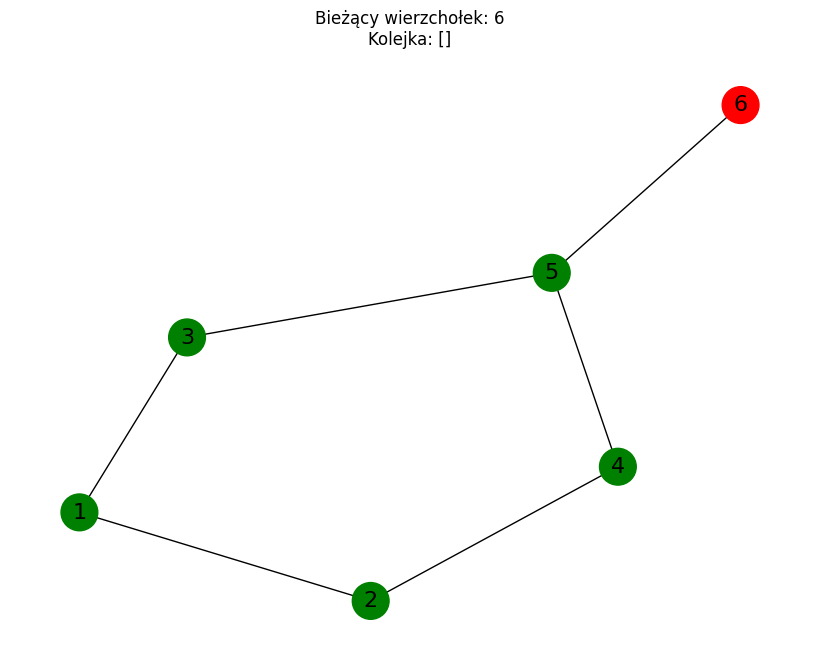

In [17]:
# Przykładowy graf
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6)]
G.add_edges_from(edges)

visualize_bfs_separate_images(G, 1)